# 🎮 Video Games Dataset: Detecting Non-Linear Correlations


In this notebook, we will:

1. Explore the relationships between video game sales and review scores.
2. Visualize scatterplots to detect non-linear patterns.
3. Calculate Pearson, Spearman, and Kendall correlation coefficients.
4. Compare and interpret the results.

Dataset: `videogames_clean.csv`


In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau

sns.set(style='whitegrid')


In [2]:

# Load dataset
df = pd.read_csv("../data/processed/clean/videogames_clean.csv")

# Select relevant numeric columns
cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']

# Drop rows with missing values in selected columns
df_clean = df[cols].dropna()

df_clean.head()


,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
0,41.36,28.96,3.77,8.45,76.0,8.0
2,15.68,12.76,3.79,3.29,82.0,8.3
3,15.61,10.93,3.28,2.95,80.0,8.0
6,11.28,9.14,6.50,2.88,89.0,8.5
7,13.96,9.18,2.93,2.84,58.0,6.6


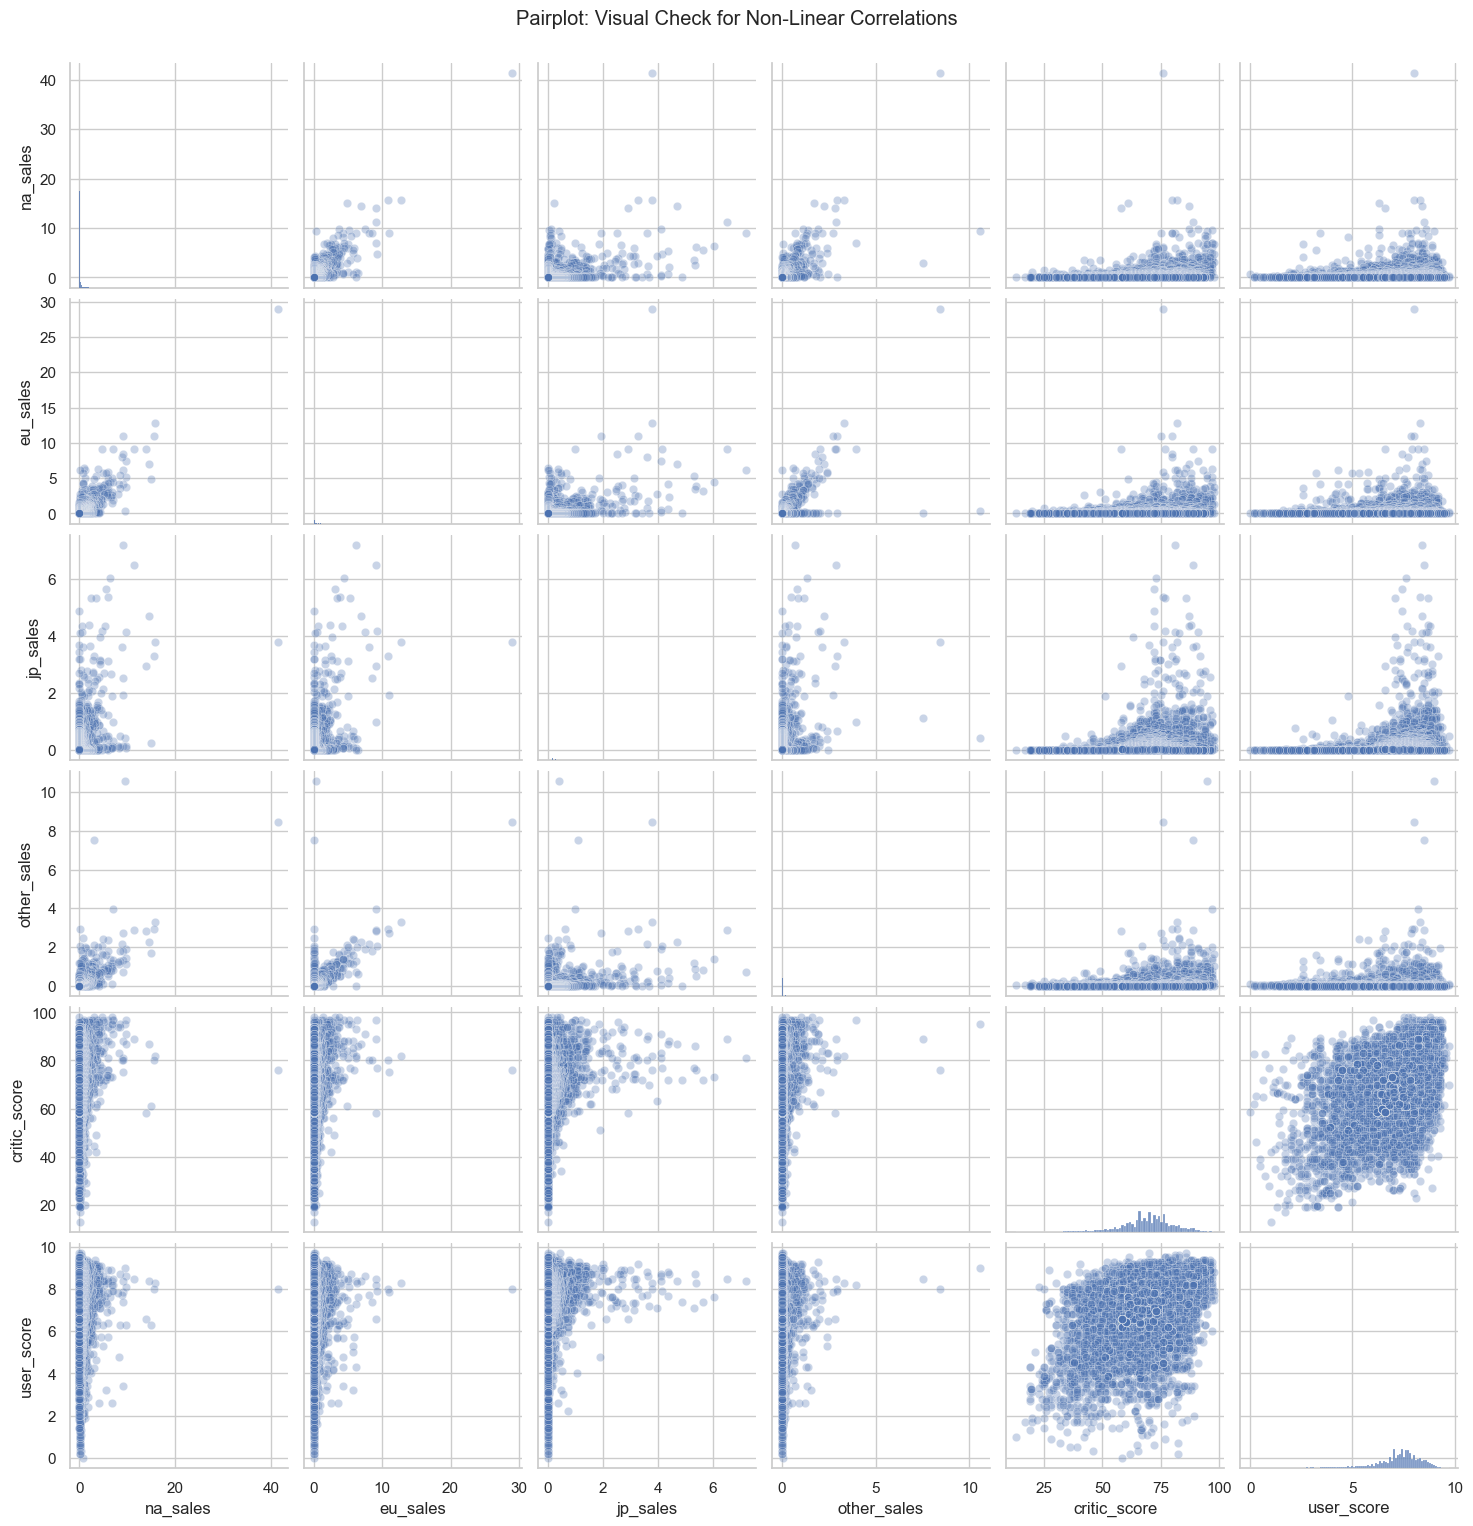

In [3]:

# Pairplot for visual inspection
sns.pairplot(df_clean, plot_kws={'alpha': 0.3})
plt.suptitle("Pairplot: Visual Check for Non-Linear Correlations", y=1.02)
plt.show()


In [4]:

# Function to calculate all correlations
def calculate_all_correlations(df, cols):
    results = []
    for col1 in cols:
        for col2 in cols:
            if col1 != col2:
                pearson_corr, _ = pearsonr(df[col1], df[col2])
                spearman_corr, _ = spearmanr(df[col1], df[col2])
                kendall_corr, _ = kendalltau(df[col1], df[col2])
                results.append({
                    'Var1': col1,
                    'Var2': col2,
                    'Pearson': round(pearson_corr, 3),
                    'Spearman': round(spearman_corr, 3),
                    'Kendall': round(kendall_corr, 3)
                })
    return pd.DataFrame(results)

# Apply function
correlation_results = calculate_all_correlations(df_clean, cols)
correlation_results.sort_values(by='Spearman', key=abs, ascending=False)


,Var1,Var2,Pearson,Spearman,Kendall
15,other_sales,na_sales,0.721,0.797,0.667
2,na_sales,other_sales,0.721,0.797,0.667
16,other_sales,eu_sales,0.729,0.757,0.652
7,eu_sales,other_sales,0.729,0.757,0.652
5,eu_sales,na_sales,0.837,0.655,0.533
...,...,...,...,...,...
25,user_score,na_sales,0.066,0.087,0.060
17,other_sales,jp_sales,0.326,-0.059,-0.050
12,jp_sales,other_sales,0.326,-0.059,-0.050
19,other_sales,user_score,0.036,0.042,0.029



### 🧠 Interpretation Guide:

- **Pearson ≈ 0**, but **Spearman or Kendall ≥ 0.3** → Suggests non-linear but monotonic relationship
- **All three ≈ 0** → Likely no correlation
- **All three strong (≥ 0.7)** → Strong relationship, likely linear

Use visualizations to support or reject what correlations suggest.


| Type | What it measures | When to use it |
| ------------ | ---------------------------------------------------------- | ------------------------------------------------------------- |
| **Pearson** | **Linear** relationship between two continuous variables | When the data have a normal distribution and a linear relationship |
| **Spearman** | **Monotonic** relationship (increasing or decreasing, not linear). Range correlation. | When there is **order** but no linear shape |
| **Kendall** | Similar to Spearman, but more robust to outliers. Agreement between ordered pairs | Useful with ordinal data or many repetitions / ties |

| (Absolute) Value | General Interpretation | What does it mean? |
| ---------------- | ------------------------------- | ------------------------------------------------------------------------------- |
| 0.00 – 0.10 | 🔸 **Very Weak / No Relationship** | Virtually no relationship (or too weak to be relied upon) |
| 0.10 – 0.30 | 🔹 **Weak** | Slight relationship exists, but may be sensitive to noise |
| 0.30 – 0.50 | 🟡 **Moderate** | Visible relationship, but not strong |
| 0.50 – 0.70 | 🟠 **Strong** | Good relationship, decisions can be made with more confidence |
| 0.70 – 0.90 | 🔴 **Very Strong** | Strong association between variables |
| 0.90 – 1.00 | 🔥 **Almost perfect / Perfect** | The variables move practically together (or are the same thing in disguise!) |